In [70]:
#from google.colab import files
#uploaded = files.upload()

In [71]:
!ls


insurance.csv  sample_data


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
# read the csv file
data = pd.read_csv('insurance.csv').to_numpy()
data

array([[   18, 10000],
       [   22, 15000],
       [   23, 18000],
       [   26, 21000],
       [   28, 24000],
       [   31, 26500],
       [   33, 27000],
       [   35, 30000],
       [   37, 33000],
       [   40, 37000]])

In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [74]:
X = data[:,0].reshape(-1,1)   #reshape to making N * D
Y = data[:,1]

In [75]:
X

array([[18],
       [22],
       [23],
       [26],
       [28],
       [31],
       [33],
       [35],
       [37],
       [40]])

In [76]:
Y

array([10000, 15000, 18000, 21000, 24000, 26500, 27000, 30000, 33000,
       37000])

In [77]:
X.shape

(10, 1)

In [78]:
Y.shape

(10,)

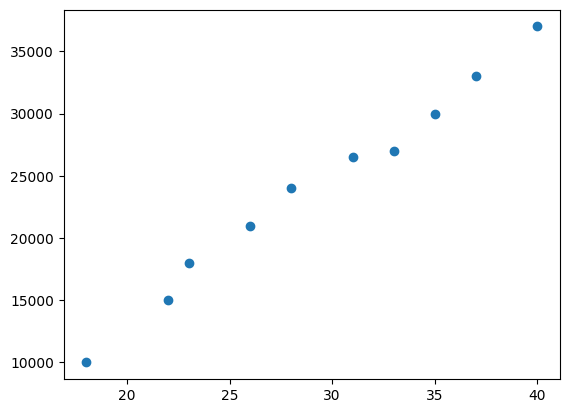

In [79]:
plt.scatter(X,Y);

In [80]:
#Standardize your features (optional but recommended):
df = pd.read_csv('insurance.csv')
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])


In [81]:
#Split your data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Premium'], test_size=0.2, random_state=42)


In [82]:
#Create a linear regression model using TensorFlow:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Input layer with one feature
    tf.keras.layers.Dense(1)  # Output layer with one neuron for linear regression
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')  # You can choose a different optimizer and loss function if needed


In [83]:
#Train the linear regression model:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
1/1 [==============================] - 0s 405ms/step - loss: 642632832.0000 - val_loss: 630958208.0000
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 617453824.0000 - val_loss: 605976384.0000
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 593263232.0000 - val_loss: 581979136.0000
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 570022336.0000 - val_loss: 558927744.0000
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 547693824.0000 - val_loss: 536784960.0000
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 526241920.0000 - val_loss: 515515168.0000
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 505632064.0000 - val_loss: 495084000.0000
Epoch 8/100
1/1 [==============================] - 0s 40ms/step - loss: 485831296.0000 - val_loss: 475458400.0000
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: 466807744.0000 

In [84]:
#Evaluate the model:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


1/1 [==============================] - 0s 25ms/step - loss: 10790578.0000
Test Loss: 10790578.0


In [96]:
X_test

,Age
8,1.140147
1,-1.080918


In [105]:
#Make predictions using the trained model:
predictions = model.predict(X_test)
predictions



1/1 [==============================] - 0s 40ms/step


array([[28478.15 ],
       [13935.091]], dtype=float32)

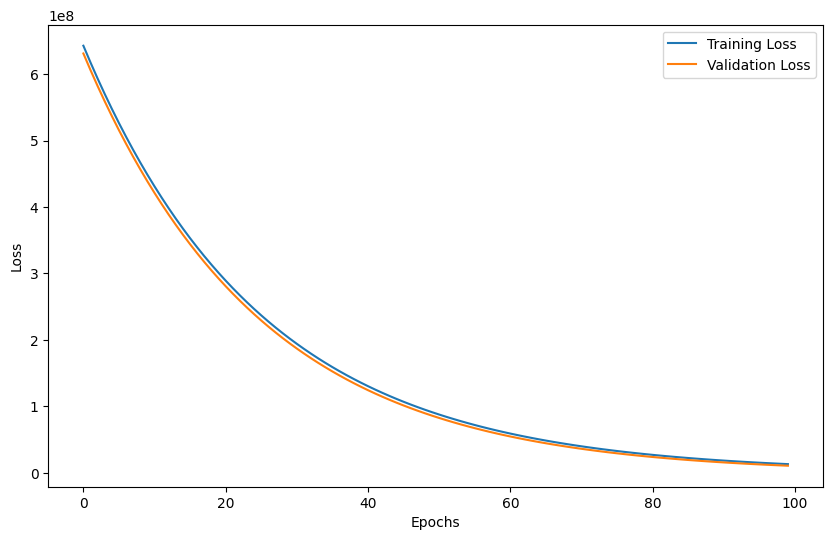

In [86]:
# Visualize the training process
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

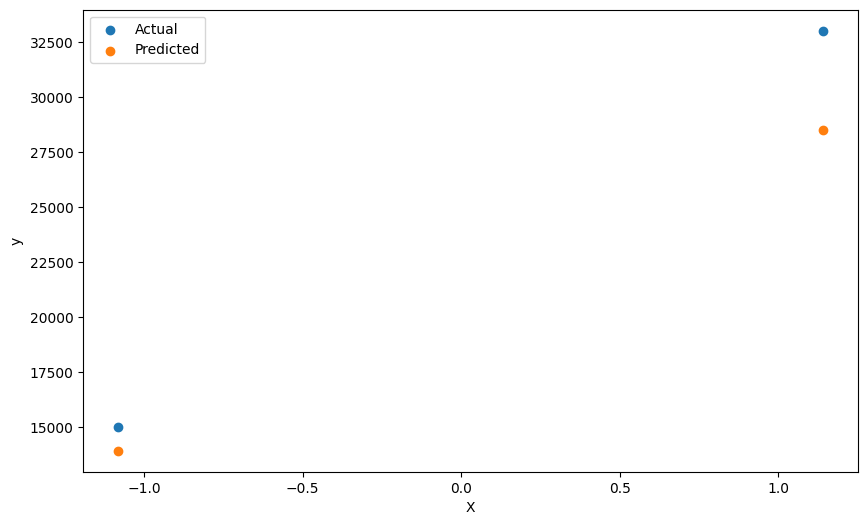

In [87]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predictions, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

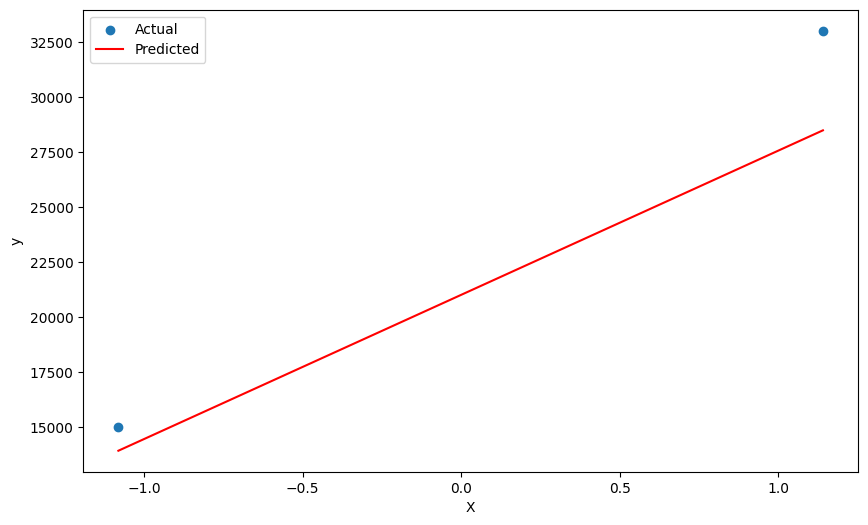

In [88]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, predictions, color='red',label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [89]:
#Extract the model's weights (slope) and bias (intercept) from the trained model:
slope = model.layers[0].get_weights()[0][0]  # Extract the slope
intercept = model.layers[0].get_weights()[1][0]  # Extract the intercept


In [90]:
slope

array([6547.787], dtype=float32)

In [91]:
intercept

21012.713

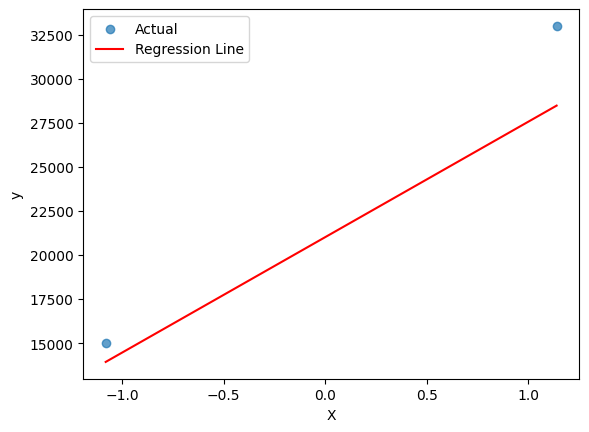

In [92]:
#Plot the data points along with the regression line:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X_test, y_test, label='Actual', alpha=0.7)

# Generate x values for the regression line
x_values = np.linspace(X_test.min(), X_test.max(), 100)

# Calculate y values using the regression line equation (y = mx + b)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
